In [1]:
import catboost
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sweetviz

from sklearn.model_selection import train_test_split
from nflows.distributions import ConditionalDiagonalNormal

from src.probabilistic_flow_boosting.tfboost.tree import EmbeddableCatBoostPriorNormal
from src.probabilistic_flow_boosting.tfboost.tfboost import TreeFlowBoost
from src.probabilistic_flow_boosting.tfboost.flow import ContinuousNormalizingFlow
from src.probabilistic_flow_boosting.pipelines.reporting.nodes import calculate_nll

from src.probabilistic_flow_boosting.pipelines.modeling.utils import setup_random_seed

RANDOM_SEED = 42

setup_random_seed(RANDOM_SEED)

/opt/conda/lib/python3.6/site-packages/sweetviz/config.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  the_open = pkg_resources.open_text("sweetviz", 'sweetviz_defaults.ini')


In [2]:
df = pd.read_csv('data/01_raw/CatData/sydney_house/SydneyHousePrices.csv')

                                             |          | [  0%]   00:00 -> (? left)


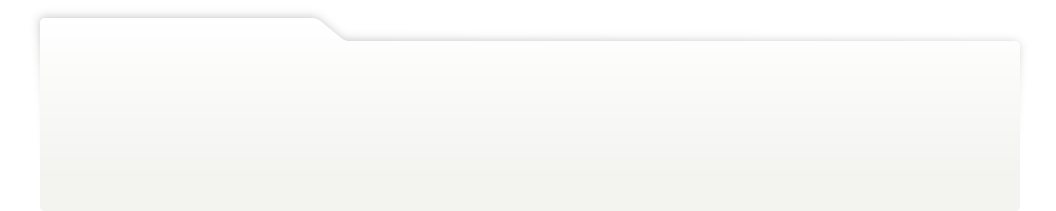
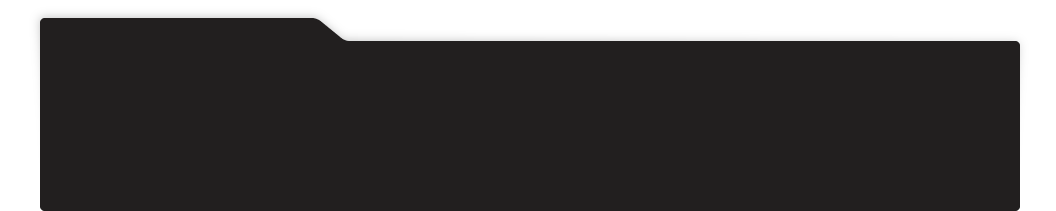
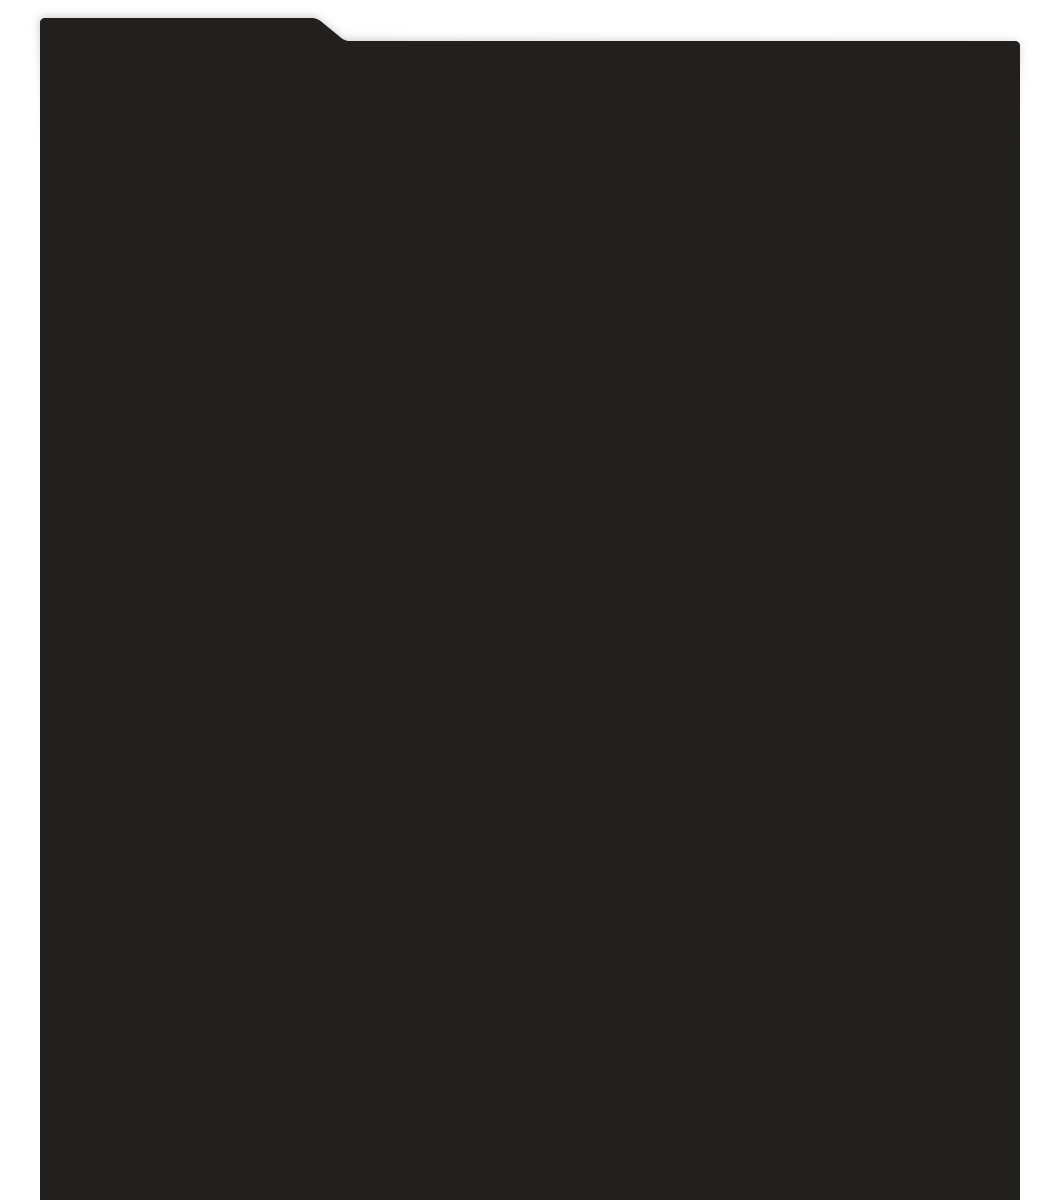
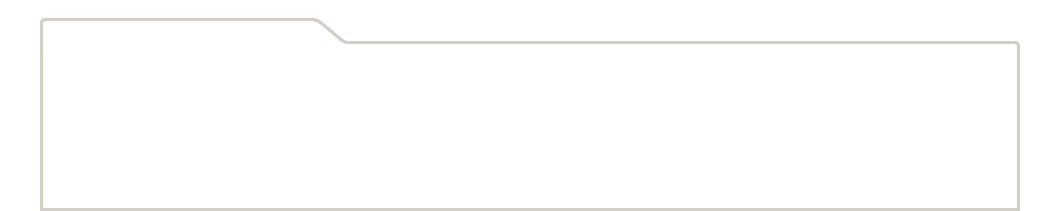
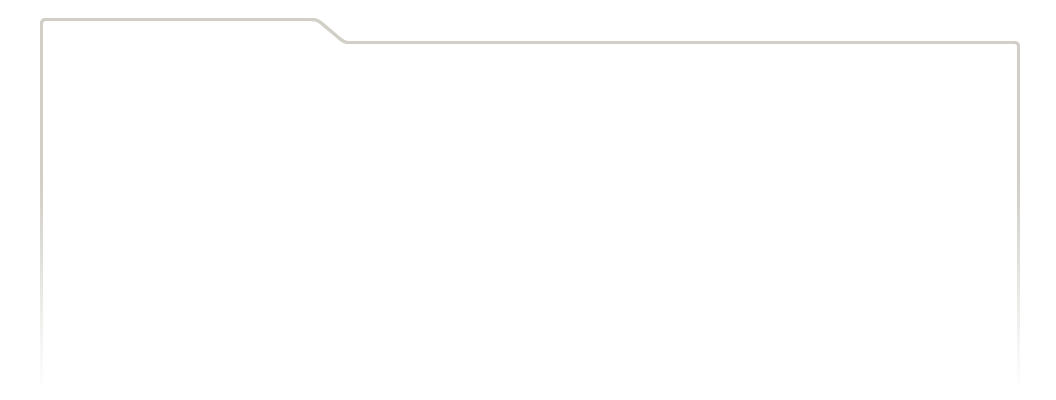
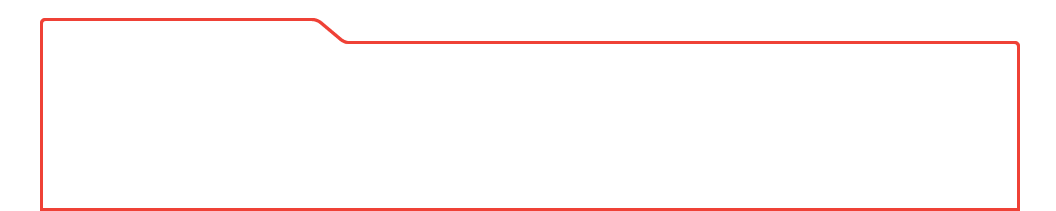
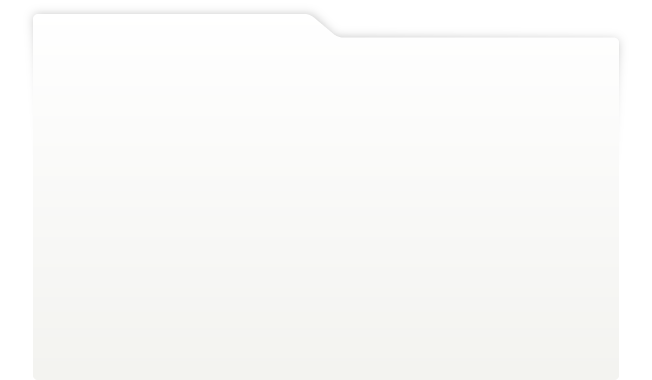
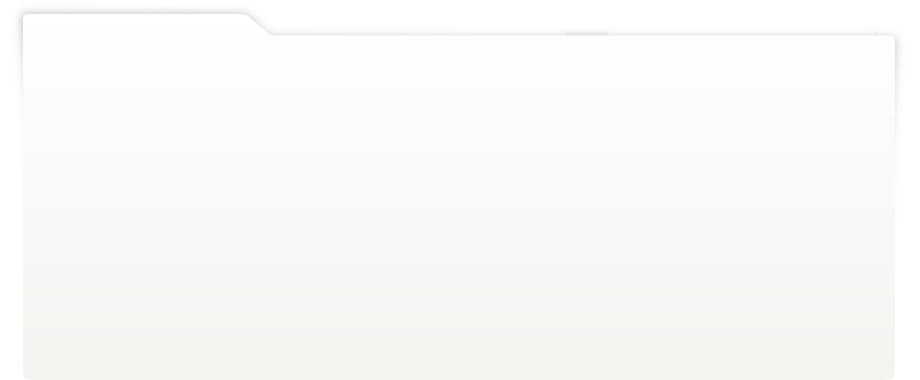
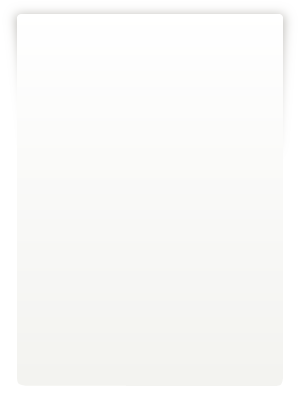
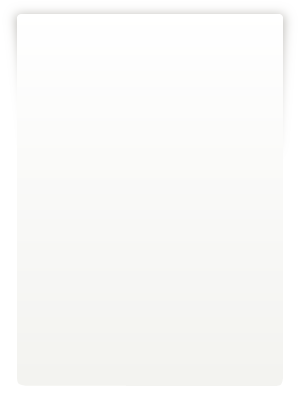
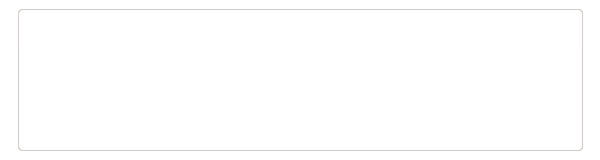
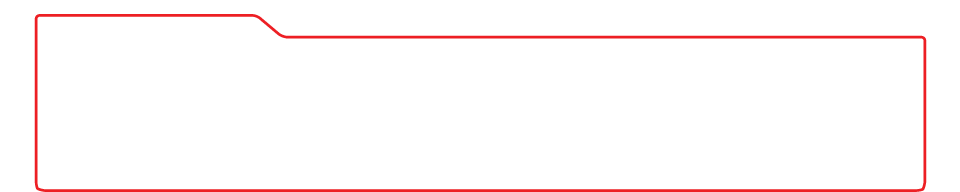
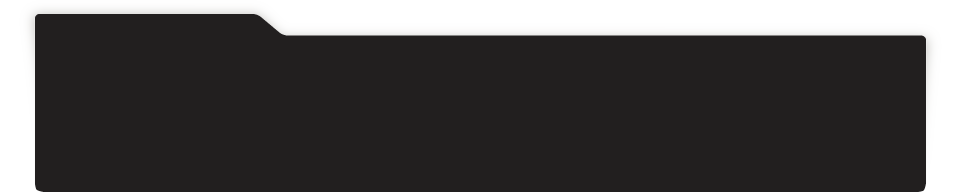
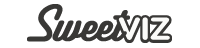
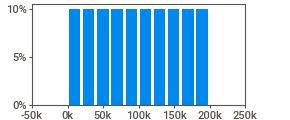
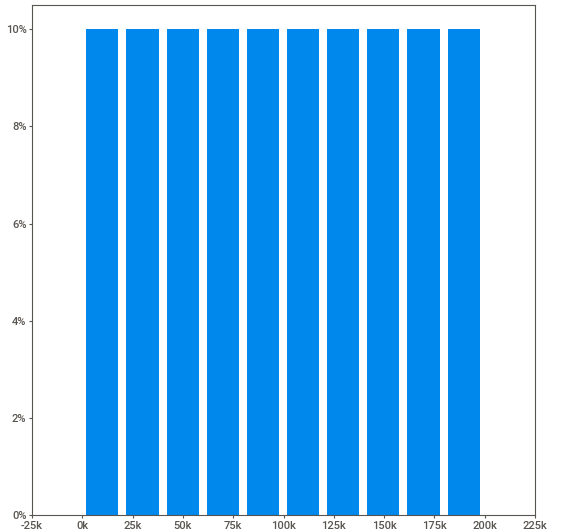
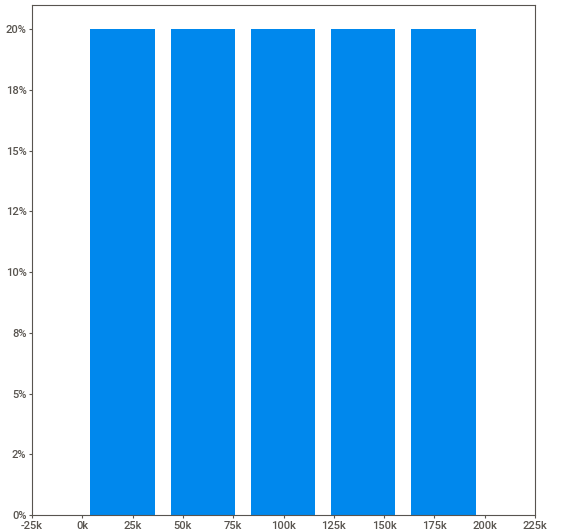
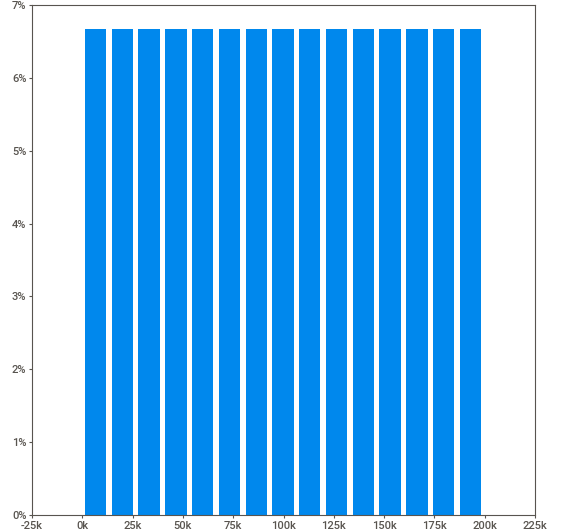
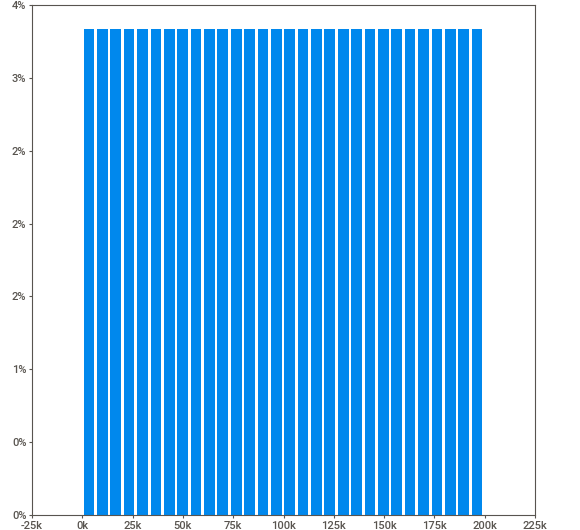
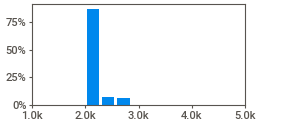
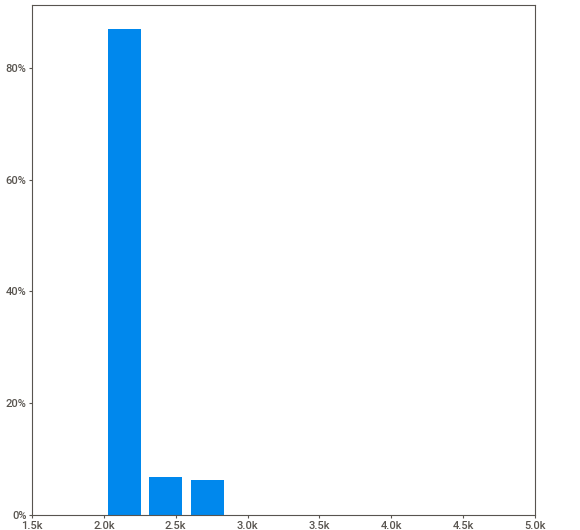
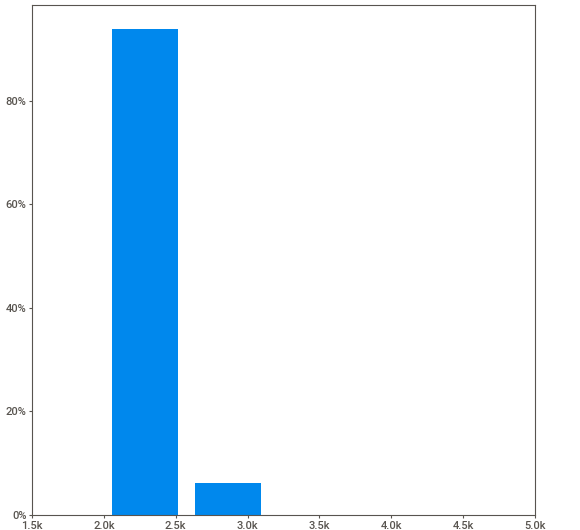
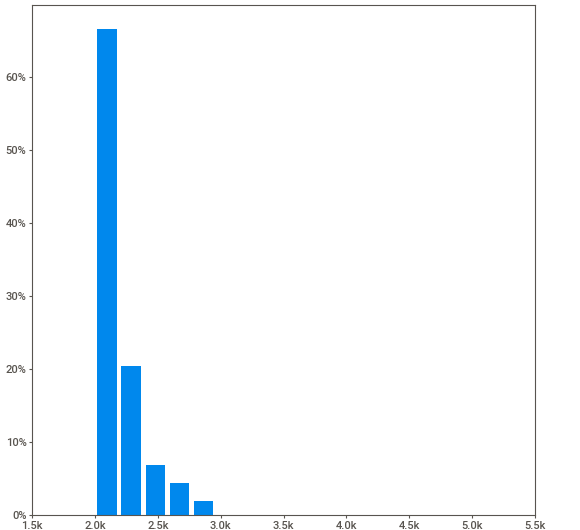
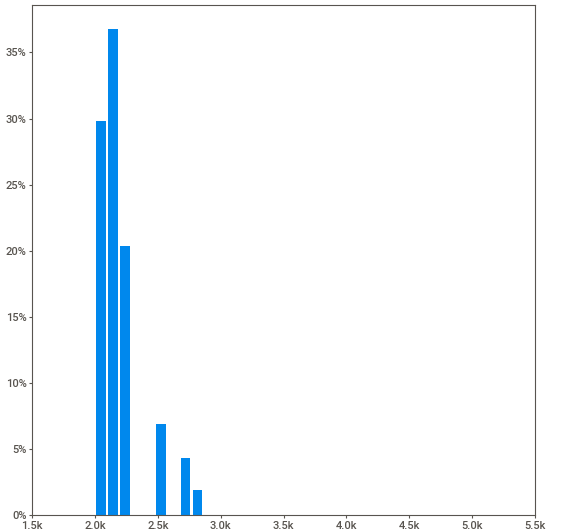
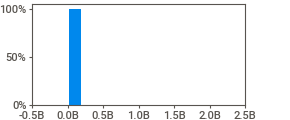
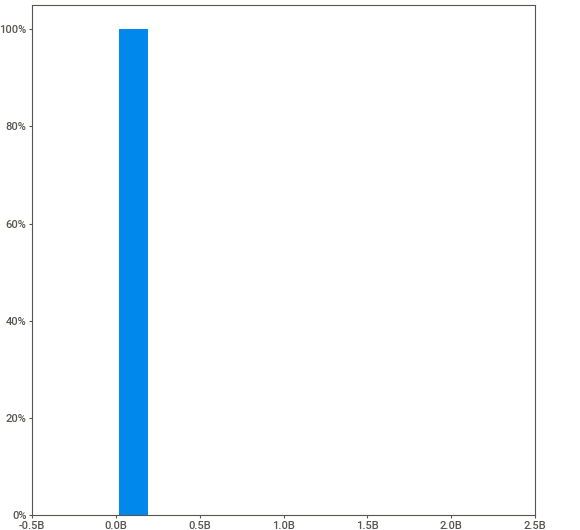
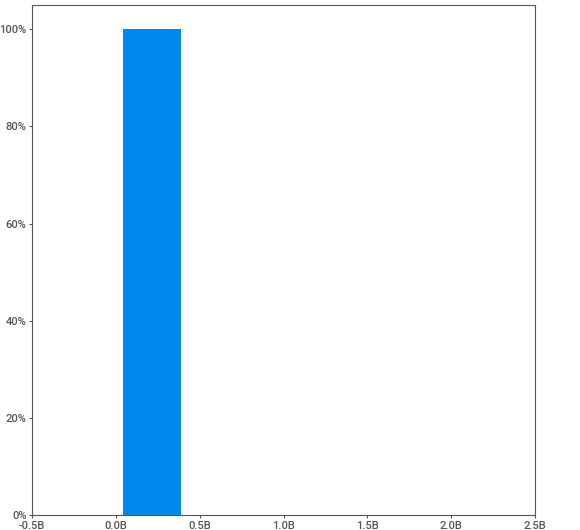
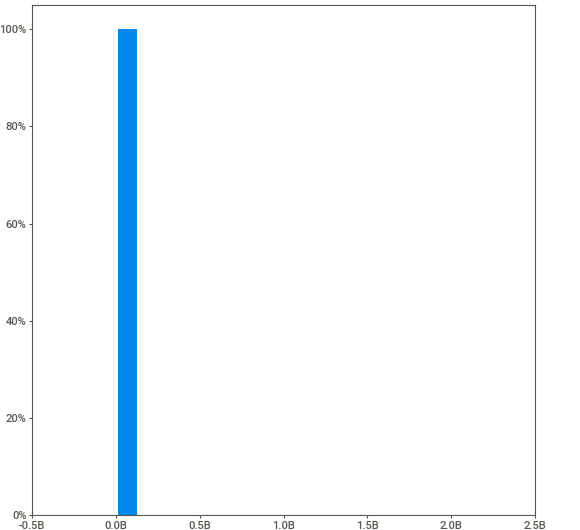
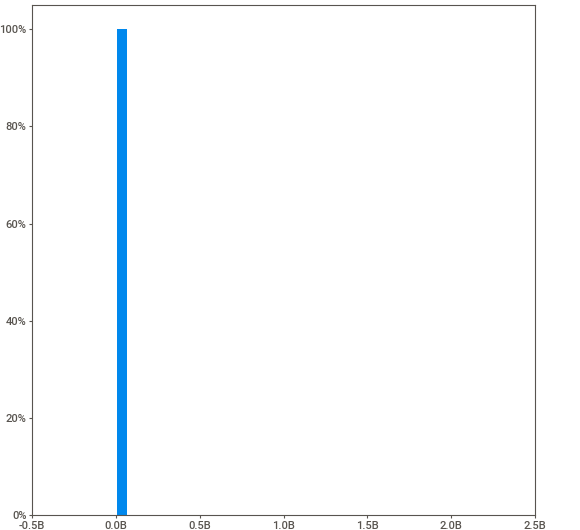
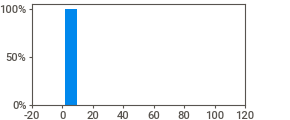
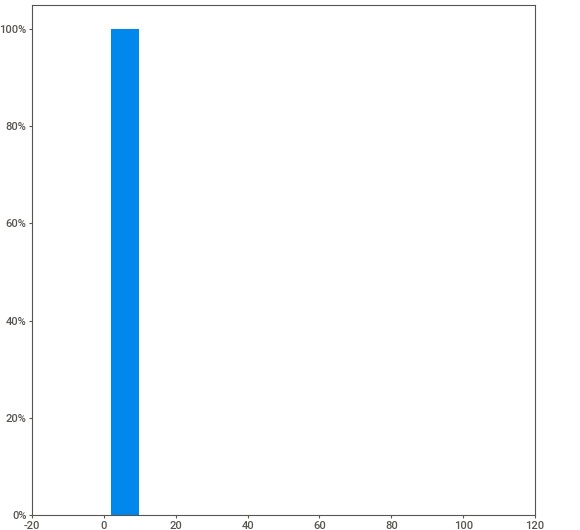
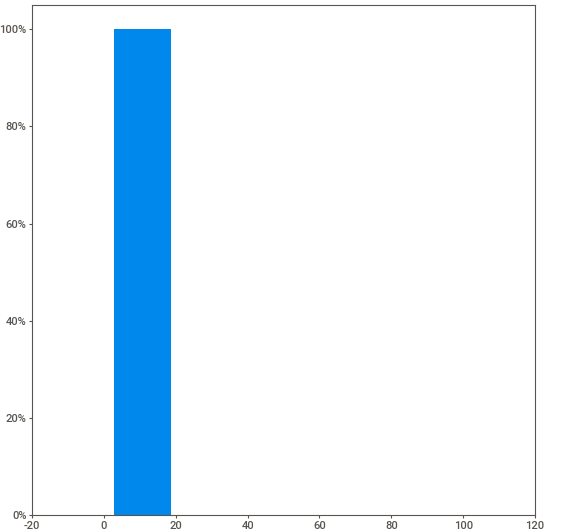
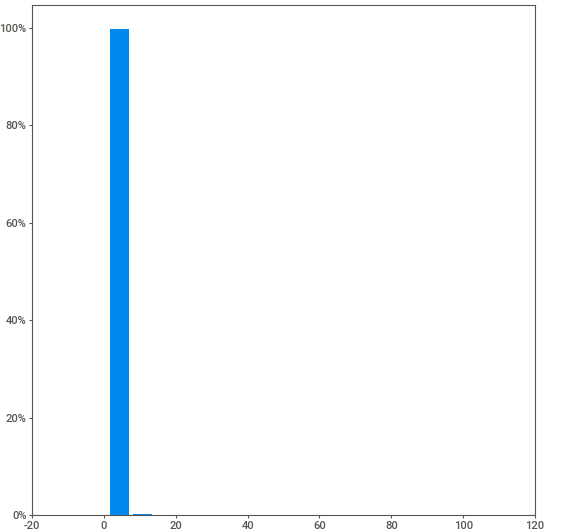
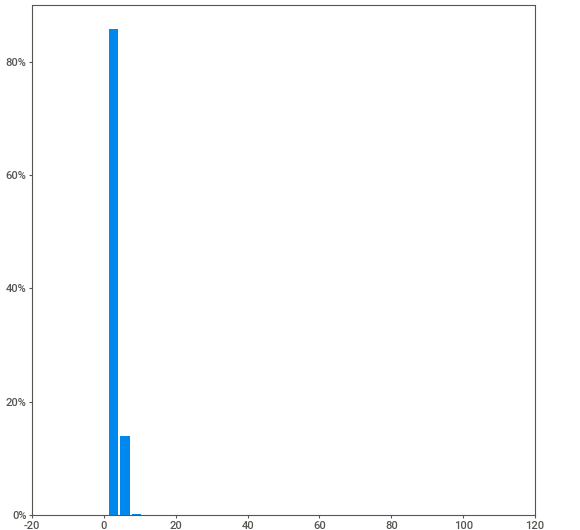
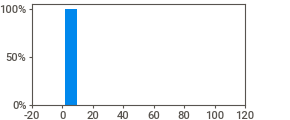
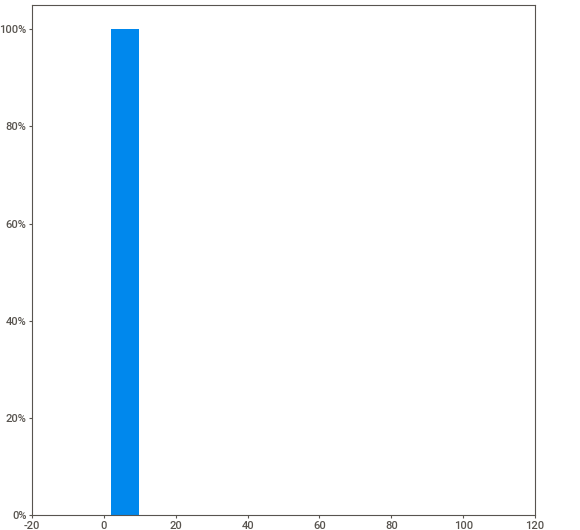
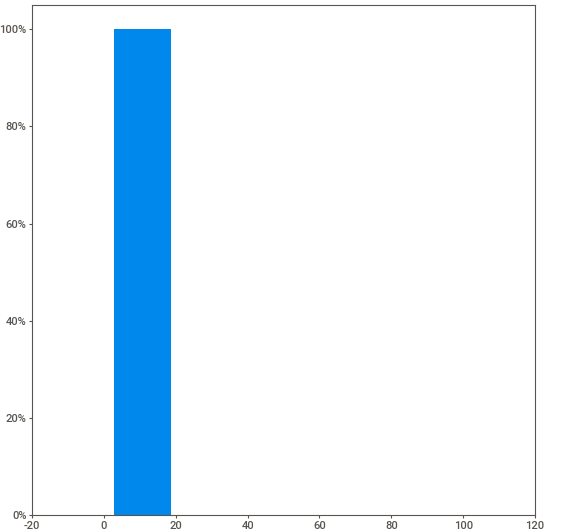
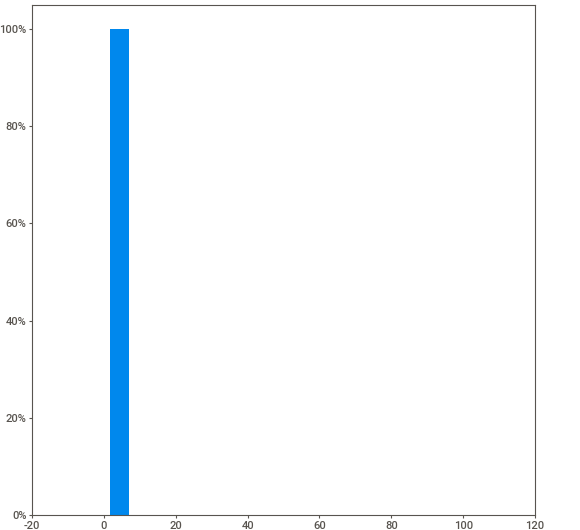
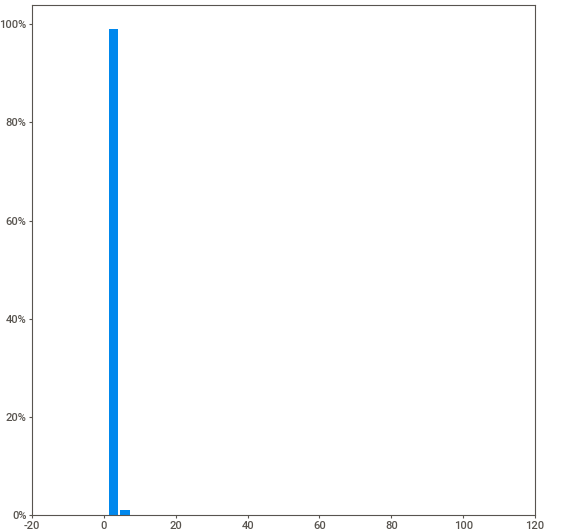
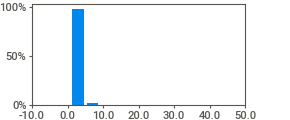
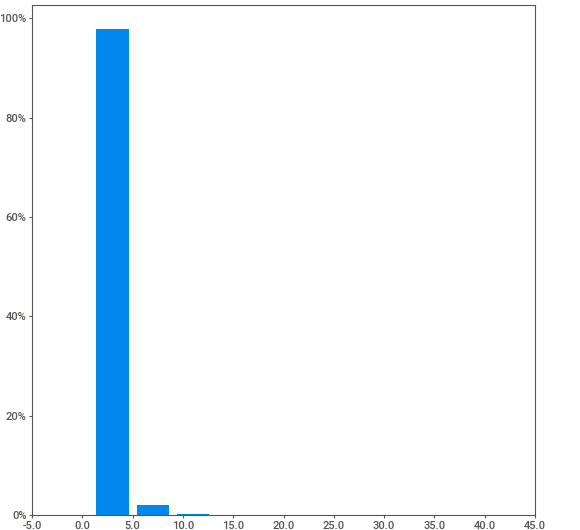
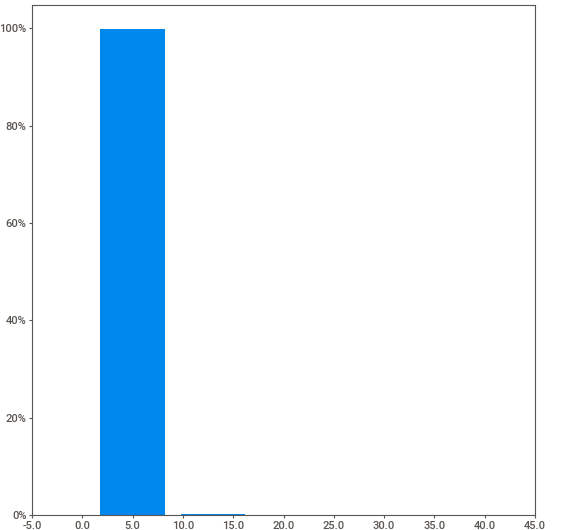
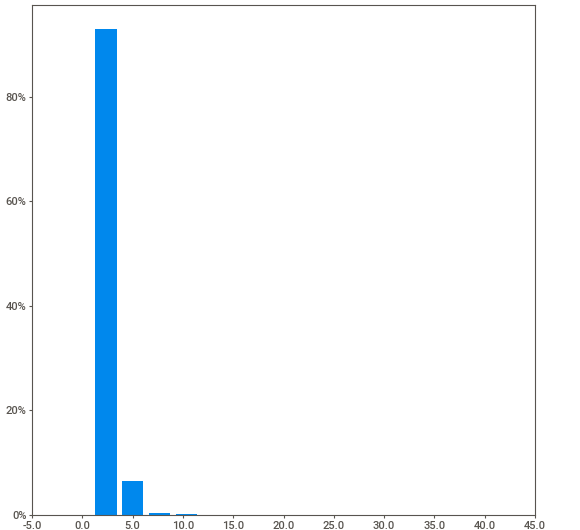
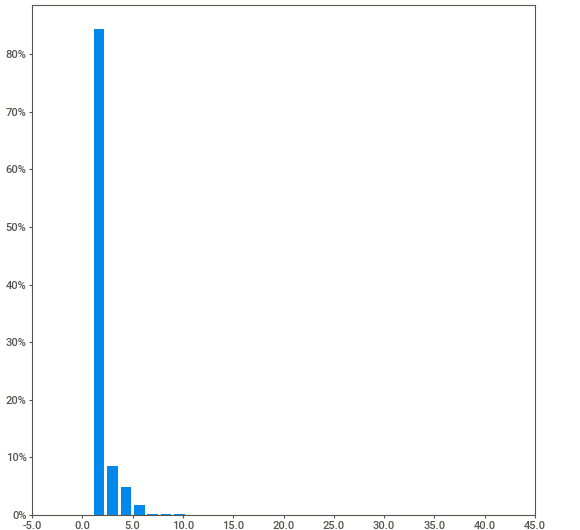
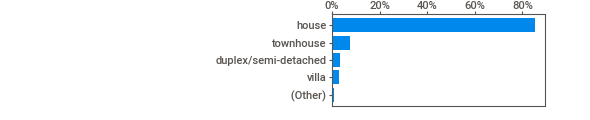
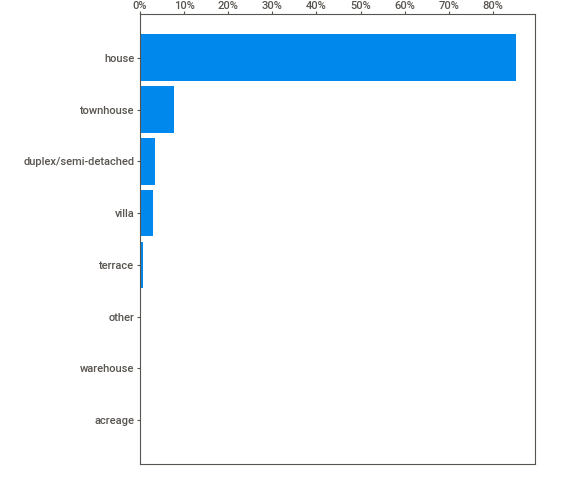
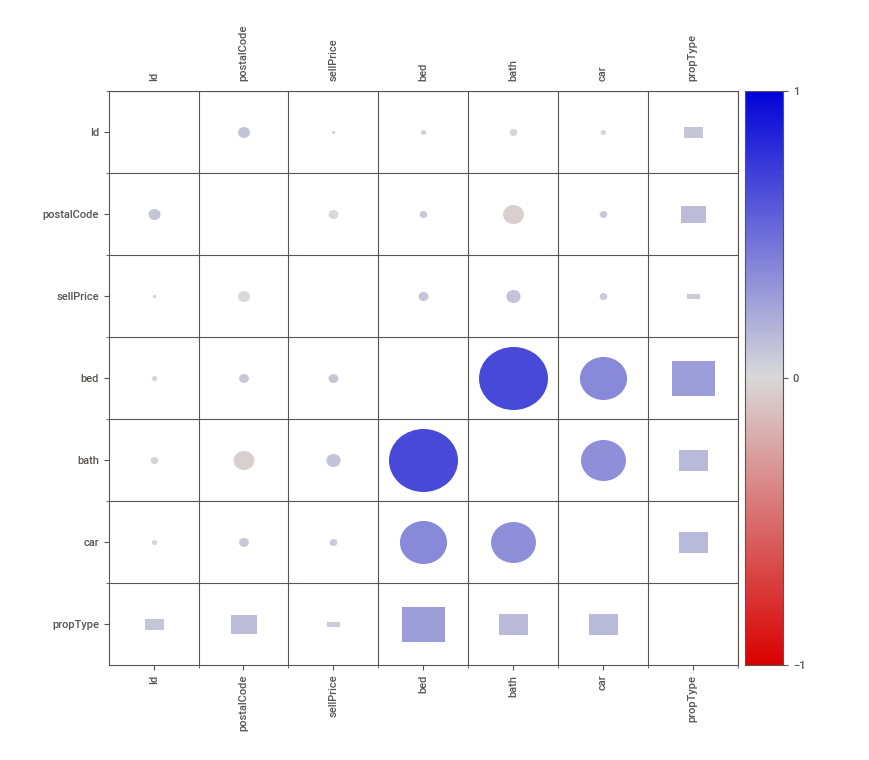
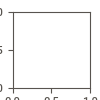

In [3]:
analysis = sweetviz.analyze(df)
analysis.show_notebook()

In [4]:
x = df.drop(columns = ['Date', 'Id', 'sellPrice'])
y = np.log10(df[['sellPrice']])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [6]:
x_train.shape, x_test.shape

((159603, 6), (39901, 6))

In [8]:
model = catboost.CatBoostRegressor(
    cat_features=['suburb', 'postalCode', 'propType'], 
    loss_function="RMSEWithUncertainty",
)

In [9]:
model.fit(x_tr, y_tr, eval_set=(x_val, y_val))

0:	learn: 0.0001185	test: 0.0055680	best: 0.0055680 (0)	total: 72.3ms	remaining: 1m 12s
1:	learn: -0.0229990	test: -0.0191571	best: -0.0191571 (1)	total: 100ms	remaining: 49.9s
2:	learn: -0.0426572	test: -0.0395298	best: -0.0395298 (2)	total: 119ms	remaining: 39.6s
3:	learn: -0.0596374	test: -0.0573453	best: -0.0573453 (3)	total: 136ms	remaining: 34s
4:	learn: -0.0761972	test: -0.0740425	best: -0.0740425 (4)	total: 155ms	remaining: 30.8s
5:	learn: -0.0902123	test: -0.0882356	best: -0.0882356 (5)	total: 181ms	remaining: 30s
6:	learn: -0.1036982	test: -0.1022888	best: -0.1022888 (6)	total: 198ms	remaining: 28.1s
7:	learn: -0.1161307	test: -0.1147790	best: -0.1147790 (7)	total: 217ms	remaining: 27s
8:	learn: -0.1274828	test: -0.1262949	best: -0.1262949 (8)	total: 237ms	remaining: 26.1s
9:	learn: -0.1390990	test: -0.1383469	best: -0.1383469 (9)	total: 254ms	remaining: 25.2s
10:	learn: -0.1501469	test: -0.1492517	best: -0.1492517 (10)	total: 269ms	remaining: 24.2s
11:	learn: -0.1585858	test

100:	learn: -0.4697763	test: -0.4433667	best: -0.4433667 (100)	total: 1.98s	remaining: 17.6s
101:	learn: -0.4704919	test: -0.4437811	best: -0.4437811 (101)	total: 1.99s	remaining: 17.5s
102:	learn: -0.4719794	test: -0.4448253	best: -0.4448253 (102)	total: 2s	remaining: 17.5s
103:	learn: -0.4727592	test: -0.4452188	best: -0.4452188 (103)	total: 2.02s	remaining: 17.5s
104:	learn: -0.4735667	test: -0.4459335	best: -0.4459335 (104)	total: 2.04s	remaining: 17.4s
105:	learn: -0.4745347	test: -0.4459233	best: -0.4459335 (104)	total: 2.06s	remaining: 17.3s
106:	learn: -0.4762221	test: -0.4470196	best: -0.4470196 (106)	total: 2.07s	remaining: 17.3s
107:	learn: -0.4770855	test: -0.4474454	best: -0.4474454 (107)	total: 2.09s	remaining: 17.3s
108:	learn: -0.4779667	test: -0.4479391	best: -0.4479391 (108)	total: 2.11s	remaining: 17.2s
109:	learn: -0.4793531	test: -0.4488295	best: -0.4488295 (109)	total: 2.12s	remaining: 17.2s
110:	learn: -0.4803605	test: -0.4493263	best: -0.4493263 (110)	total: 2.1

199:	learn: -0.5363596	test: -0.4739266	best: -0.4740963 (198)	total: 3.64s	remaining: 14.6s
200:	learn: -0.5365204	test: -0.4739468	best: -0.4740963 (198)	total: 3.66s	remaining: 14.6s
201:	learn: -0.5384788	test: -0.4739976	best: -0.4740963 (198)	total: 3.68s	remaining: 14.5s
202:	learn: -0.5384856	test: -0.4739345	best: -0.4740963 (198)	total: 3.68s	remaining: 14.5s
203:	learn: -0.5389755	test: -0.4738655	best: -0.4740963 (198)	total: 3.69s	remaining: 14.4s
204:	learn: -0.5392743	test: -0.4737952	best: -0.4740963 (198)	total: 3.71s	remaining: 14.4s
205:	learn: -0.5397449	test: -0.4738559	best: -0.4740963 (198)	total: 3.72s	remaining: 14.4s
206:	learn: -0.5399940	test: -0.4740071	best: -0.4740963 (198)	total: 3.75s	remaining: 14.4s
207:	learn: -0.5403969	test: -0.4742381	best: -0.4742381 (207)	total: 3.76s	remaining: 14.3s
208:	learn: -0.5407449	test: -0.4745034	best: -0.4745034 (208)	total: 3.78s	remaining: 14.3s
209:	learn: -0.5408555	test: -0.4742679	best: -0.4745034 (208)	total: 

293:	learn: -0.5670313	test: -0.4848255	best: -0.4848255 (293)	total: 5.28s	remaining: 12.7s
294:	learn: -0.5672275	test: -0.4847381	best: -0.4848255 (293)	total: 5.3s	remaining: 12.7s
295:	learn: -0.5673316	test: -0.4847742	best: -0.4848255 (293)	total: 5.32s	remaining: 12.6s
296:	learn: -0.5675049	test: -0.4848457	best: -0.4848457 (296)	total: 5.34s	remaining: 12.6s
297:	learn: -0.5675602	test: -0.4847568	best: -0.4848457 (296)	total: 5.36s	remaining: 12.6s
298:	learn: -0.5679238	test: -0.4848980	best: -0.4848980 (298)	total: 5.38s	remaining: 12.6s
299:	learn: -0.5681085	test: -0.4849827	best: -0.4849827 (299)	total: 5.4s	remaining: 12.6s
300:	learn: -0.5683298	test: -0.4852974	best: -0.4852974 (300)	total: 5.41s	remaining: 12.6s
301:	learn: -0.5687555	test: -0.4855078	best: -0.4855078 (301)	total: 5.43s	remaining: 12.6s
302:	learn: -0.5693419	test: -0.4860096	best: -0.4860096 (302)	total: 5.45s	remaining: 12.5s
303:	learn: -0.5696530	test: -0.4859027	best: -0.4860096 (302)	total: 5.

383:	learn: -0.5896696	test: -0.4980670	best: -0.4980670 (383)	total: 6.74s	remaining: 10.8s
384:	learn: -0.5898118	test: -0.4981482	best: -0.4981482 (384)	total: 6.75s	remaining: 10.8s
385:	learn: -0.5904525	test: -0.4984844	best: -0.4984844 (385)	total: 6.77s	remaining: 10.8s
386:	learn: -0.5906675	test: -0.4984070	best: -0.4984844 (385)	total: 6.79s	remaining: 10.8s
387:	learn: -0.5908450	test: -0.4985952	best: -0.4985952 (387)	total: 6.81s	remaining: 10.7s
388:	learn: -0.5909656	test: -0.4987506	best: -0.4987506 (388)	total: 6.83s	remaining: 10.7s
389:	learn: -0.5910435	test: -0.4988186	best: -0.4988186 (389)	total: 6.85s	remaining: 10.7s
390:	learn: -0.5911307	test: -0.4987905	best: -0.4988186 (389)	total: 6.86s	remaining: 10.7s
391:	learn: -0.5913157	test: -0.4987358	best: -0.4988186 (389)	total: 6.88s	remaining: 10.7s
392:	learn: -0.5919014	test: -0.4995606	best: -0.4995606 (392)	total: 6.89s	remaining: 10.6s
393:	learn: -0.5928358	test: -0.4997769	best: -0.4997769 (393)	total: 

476:	learn: -0.6141797	test: -0.5145716	best: -0.5145716 (476)	total: 8.39s	remaining: 9.2s
477:	learn: -0.6143908	test: -0.5145079	best: -0.5145716 (476)	total: 8.41s	remaining: 9.18s
478:	learn: -0.6145874	test: -0.5144755	best: -0.5145716 (476)	total: 8.42s	remaining: 9.16s
479:	learn: -0.6148203	test: -0.5146944	best: -0.5146944 (479)	total: 8.44s	remaining: 9.14s
480:	learn: -0.6151202	test: -0.5148509	best: -0.5148509 (480)	total: 8.45s	remaining: 9.12s
481:	learn: -0.6152047	test: -0.5148338	best: -0.5148509 (480)	total: 8.47s	remaining: 9.1s
482:	learn: -0.6153024	test: -0.5147879	best: -0.5148509 (480)	total: 8.49s	remaining: 9.09s
483:	learn: -0.6153829	test: -0.5147849	best: -0.5148509 (480)	total: 8.51s	remaining: 9.07s
484:	learn: -0.6154444	test: -0.5149106	best: -0.5149106 (484)	total: 8.53s	remaining: 9.06s
485:	learn: -0.6154981	test: -0.5149148	best: -0.5149148 (485)	total: 8.55s	remaining: 9.04s
486:	learn: -0.6158548	test: -0.5154053	best: -0.5154053 (486)	total: 8.

570:	learn: -0.6315582	test: -0.5230099	best: -0.5230099 (570)	total: 10.1s	remaining: 7.55s
571:	learn: -0.6317480	test: -0.5232226	best: -0.5232226 (571)	total: 10.1s	remaining: 7.53s
572:	learn: -0.6319685	test: -0.5230445	best: -0.5232226 (571)	total: 10.1s	remaining: 7.52s
573:	learn: -0.6320081	test: -0.5230443	best: -0.5232226 (571)	total: 10.1s	remaining: 7.5s
574:	learn: -0.6320837	test: -0.5230204	best: -0.5232226 (571)	total: 10.1s	remaining: 7.48s
575:	learn: -0.6322380	test: -0.5227833	best: -0.5232226 (571)	total: 10.1s	remaining: 7.46s
576:	learn: -0.6322723	test: -0.5227900	best: -0.5232226 (571)	total: 10.2s	remaining: 7.44s
577:	learn: -0.6322888	test: -0.5227486	best: -0.5232226 (571)	total: 10.2s	remaining: 7.43s
578:	learn: -0.6323405	test: -0.5227348	best: -0.5232226 (571)	total: 10.2s	remaining: 7.42s
579:	learn: -0.6324234	test: -0.5227527	best: -0.5232226 (571)	total: 10.2s	remaining: 7.4s
580:	learn: -0.6326644	test: -0.5227560	best: -0.5232226 (571)	total: 10

664:	learn: -0.6407557	test: -0.5250246	best: -0.5251858 (652)	total: 11.7s	remaining: 5.91s
665:	learn: -0.6407831	test: -0.5251601	best: -0.5251858 (652)	total: 11.7s	remaining: 5.89s
666:	learn: -0.6407956	test: -0.5251559	best: -0.5251858 (652)	total: 11.8s	remaining: 5.87s
667:	learn: -0.6408201	test: -0.5251613	best: -0.5251858 (652)	total: 11.8s	remaining: 5.86s
668:	learn: -0.6408623	test: -0.5251440	best: -0.5251858 (652)	total: 11.8s	remaining: 5.84s
669:	learn: -0.6410136	test: -0.5252796	best: -0.5252796 (669)	total: 11.8s	remaining: 5.83s
670:	learn: -0.6411418	test: -0.5253773	best: -0.5253773 (670)	total: 11.8s	remaining: 5.81s
671:	learn: -0.6412865	test: -0.5255697	best: -0.5255697 (671)	total: 11.9s	remaining: 5.79s
672:	learn: -0.6413967	test: -0.5257288	best: -0.5257288 (672)	total: 11.9s	remaining: 5.78s
673:	learn: -0.6415553	test: -0.5257937	best: -0.5257937 (673)	total: 11.9s	remaining: 5.76s
674:	learn: -0.6415935	test: -0.5258872	best: -0.5258872 (674)	total: 

755:	learn: -0.6489498	test: -0.5295745	best: -0.5295745 (755)	total: 13.4s	remaining: 4.32s
756:	learn: -0.6490567	test: -0.5295537	best: -0.5295745 (755)	total: 13.4s	remaining: 4.3s
757:	learn: -0.6494343	test: -0.5299125	best: -0.5299125 (757)	total: 13.4s	remaining: 4.29s
758:	learn: -0.6495318	test: -0.5300927	best: -0.5300927 (758)	total: 13.5s	remaining: 4.27s
759:	learn: -0.6495459	test: -0.5300978	best: -0.5300978 (759)	total: 13.5s	remaining: 4.25s
760:	learn: -0.6496119	test: -0.5304041	best: -0.5304041 (760)	total: 13.5s	remaining: 4.24s
761:	learn: -0.6496530	test: -0.5304102	best: -0.5304102 (761)	total: 13.5s	remaining: 4.22s
762:	learn: -0.6496975	test: -0.5304703	best: -0.5304703 (762)	total: 13.5s	remaining: 4.2s
763:	learn: -0.6497703	test: -0.5305842	best: -0.5305842 (763)	total: 13.5s	remaining: 4.18s
764:	learn: -0.6499250	test: -0.5308172	best: -0.5308172 (764)	total: 13.6s	remaining: 4.16s
765:	learn: -0.6499481	test: -0.5308387	best: -0.5308387 (765)	total: 13

851:	learn: -0.6550921	test: -0.5327480	best: -0.5327835 (850)	total: 15.3s	remaining: 2.65s
852:	learn: -0.6551007	test: -0.5327303	best: -0.5327835 (850)	total: 15.3s	remaining: 2.63s
853:	learn: -0.6552073	test: -0.5328110	best: -0.5328110 (853)	total: 15.3s	remaining: 2.62s
854:	learn: -0.6552484	test: -0.5328281	best: -0.5328281 (854)	total: 15.3s	remaining: 2.6s
855:	learn: -0.6552941	test: -0.5328635	best: -0.5328635 (855)	total: 15.4s	remaining: 2.58s
856:	learn: -0.6553345	test: -0.5328534	best: -0.5328635 (855)	total: 15.4s	remaining: 2.56s
857:	learn: -0.6553805	test: -0.5329530	best: -0.5329530 (857)	total: 15.4s	remaining: 2.55s
858:	learn: -0.6554574	test: -0.5329564	best: -0.5329564 (858)	total: 15.4s	remaining: 2.53s
859:	learn: -0.6554692	test: -0.5329330	best: -0.5329564 (858)	total: 15.4s	remaining: 2.51s
860:	learn: -0.6555838	test: -0.5330183	best: -0.5330183 (860)	total: 15.5s	remaining: 2.5s
861:	learn: -0.6556742	test: -0.5329884	best: -0.5330183 (860)	total: 15

948:	learn: -0.6607468	test: -0.5345410	best: -0.5346137 (925)	total: 16.9s	remaining: 909ms
949:	learn: -0.6607735	test: -0.5344989	best: -0.5346137 (925)	total: 16.9s	remaining: 891ms
950:	learn: -0.6607896	test: -0.5345255	best: -0.5346137 (925)	total: 16.9s	remaining: 873ms
951:	learn: -0.6608538	test: -0.5347811	best: -0.5347811 (951)	total: 17s	remaining: 855ms
952:	learn: -0.6609046	test: -0.5348128	best: -0.5348128 (952)	total: 17s	remaining: 837ms
953:	learn: -0.6609247	test: -0.5347686	best: -0.5348128 (952)	total: 17s	remaining: 819ms
954:	learn: -0.6609990	test: -0.5348208	best: -0.5348208 (954)	total: 17s	remaining: 801ms
955:	learn: -0.6610436	test: -0.5348610	best: -0.5348610 (955)	total: 17s	remaining: 783ms
956:	learn: -0.6610989	test: -0.5349239	best: -0.5349239 (956)	total: 17s	remaining: 765ms
957:	learn: -0.6611424	test: -0.5348849	best: -0.5349239 (956)	total: 17s	remaining: 747ms
958:	learn: -0.6612100	test: -0.5349315	best: -0.5349315 (958)	total: 17.1s	remainin

In [10]:
def calculate_nll_catboost(model: catboost.CatBoostRegressor, x: pd.DataFrame, y: pd.DataFrame):
    x: np.ndarray = x.values
    y: np.ndarray = y.values

    if y.shape[1] > 1:
        return np.nan

    y_hat_tree = model.predict(x)
    y_hat_tree[:, 1] = np.log(np.sqrt(y_hat_tree[:, 1]))  # Transform var to log std / CatBoost RMSEWithUncertainty

    distribution = ConditionalDiagonalNormal(shape=[1])  # Assume 1D distribution
    return -distribution.log_prob(y, y_hat_tree).numpy().mean()

In [11]:
calculate_nll_catboost(model, x_train, y_train)

-0.6193601654645925

In [12]:
calculate_nll_catboost(model, x_test, y_test)

-0.491154921130714

In [14]:
tree = EmbeddableCatBoostPriorNormal(
    cat_features=[0, 1, 5], 
    loss_function="RMSEWithUncertainty",
    depth=4,
    num_trees=200,
    random_state=RANDOM_SEED
)
flow = ContinuousNormalizingFlow(input_dim=1, hidden_dims=(200, 100, 100, 50), 
                                 num_blocks=5, context_dim=100, conditional=True)

treeflow = TreeFlowBoost(tree, flow, embedding_size=100)

In [15]:
treeflow.fit(x_tr.values, y_tr.values, x_val.values, y_val.values, n_epochs=30, batch_size=1024, verbose=True)

0:	learn: 0.0026200	total: 20.6ms	remaining: 4.09s
1:	learn: -0.0181178	total: 38.2ms	remaining: 3.78s
2:	learn: -0.0370806	total: 51ms	remaining: 3.35s
3:	learn: -0.0525247	total: 65.5ms	remaining: 3.21s
4:	learn: -0.0665896	total: 82.3ms	remaining: 3.21s
5:	learn: -0.0795573	total: 94.3ms	remaining: 3.05s
6:	learn: -0.0904900	total: 107ms	remaining: 2.94s
7:	learn: -0.1012950	total: 120ms	remaining: 2.87s
8:	learn: -0.1132027	total: 129ms	remaining: 2.73s
9:	learn: -0.1239865	total: 141ms	remaining: 2.68s
10:	learn: -0.1349828	total: 152ms	remaining: 2.62s
11:	learn: -0.1450410	total: 161ms	remaining: 2.53s
12:	learn: -0.1525497	total: 174ms	remaining: 2.5s
13:	learn: -0.1616871	total: 185ms	remaining: 2.46s
14:	learn: -0.1699349	total: 194ms	remaining: 2.39s
15:	learn: -0.1790539	total: 203ms	remaining: 2.34s
16:	learn: -0.1858020	total: 215ms	remaining: 2.31s
17:	learn: -0.1939492	total: 231ms	remaining: 2.33s
18:	learn: -0.2016899	total: 242ms	remaining: 2.31s
19:	learn: -0.209176

166:	learn: -0.4723030	total: 1.87s	remaining: 370ms
167:	learn: -0.4724513	total: 1.89s	remaining: 359ms
168:	learn: -0.4732563	total: 1.89s	remaining: 348ms
169:	learn: -0.4733785	total: 1.9s	remaining: 336ms
170:	learn: -0.4738738	total: 1.92s	remaining: 325ms
171:	learn: -0.4741950	total: 1.93s	remaining: 314ms
172:	learn: -0.4744042	total: 1.94s	remaining: 303ms
173:	learn: -0.4744098	total: 1.95s	remaining: 291ms
174:	learn: -0.4754740	total: 1.96s	remaining: 280ms
175:	learn: -0.4757316	total: 1.97s	remaining: 268ms
176:	learn: -0.4759044	total: 1.98s	remaining: 257ms
177:	learn: -0.4759108	total: 1.98s	remaining: 245ms
178:	learn: -0.4761763	total: 2s	remaining: 234ms
179:	learn: -0.4765131	total: 2s	remaining: 223ms
180:	learn: -0.4775300	total: 2.02s	remaining: 212ms
181:	learn: -0.4782111	total: 2.03s	remaining: 201ms
182:	learn: -0.4782630	total: 2.04s	remaining: 189ms
183:	learn: -0.4788951	total: 2.05s	remaining: 178ms
184:	learn: -0.4790153	total: 2.06s	remaining: 167ms


TreeFlowBoost(embedding_size=100,
              flow_model=<src.probabilistic_flow_boosting.tfboost.flow.flow.ContinuousNormalizingFlow object at 0x7f4179f99518>,
              tree_model=<src.probabilistic_flow_boosting.tfboost.tree.ecatboost.EmbeddableCatBoostPriorNormal object at 0x7f4179f99710>)

In [16]:
calculate_nll(treeflow, x_train, y_train, batch_size = 1024)

-0.7912652

In [17]:
calculate_nll(treeflow, x_test, y_test, batch_size = 1024)

-0.7188909

In [18]:
data = x_test.iloc[:10, :]

In [19]:
y_test_catboost = model.predict(data)

y_test_samples = treeflow.sample(data, num_samples=1000)
y_test_samples = y_test_samples.squeeze()

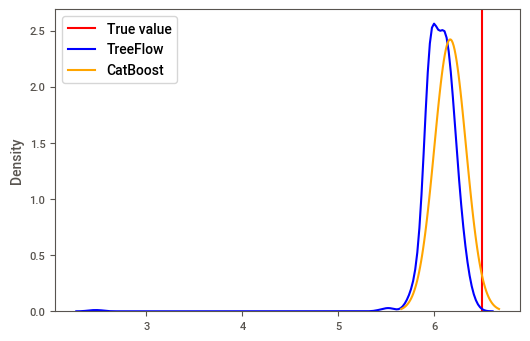

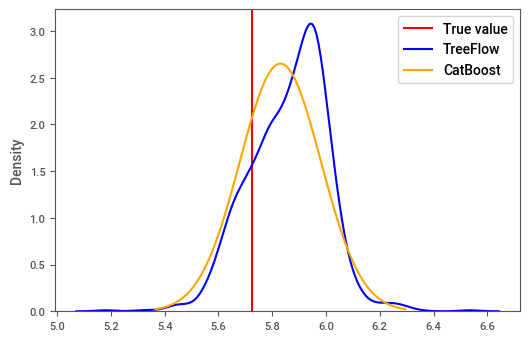

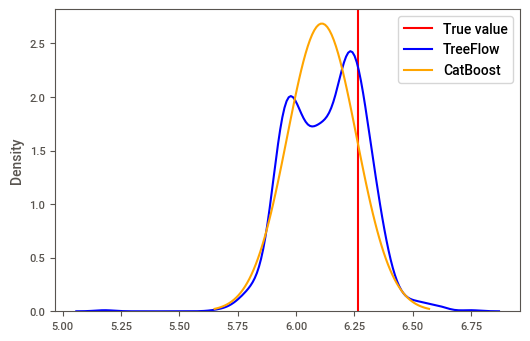

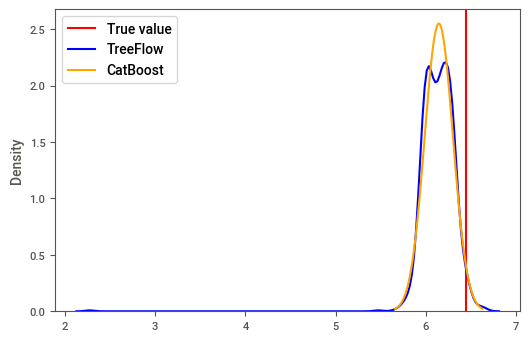

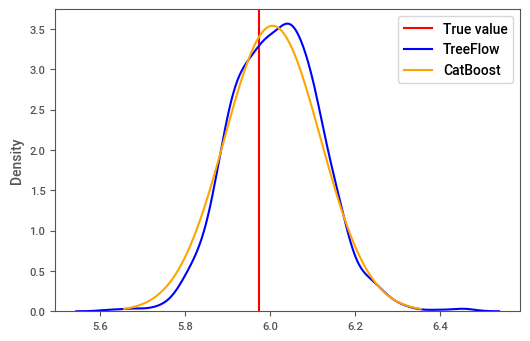

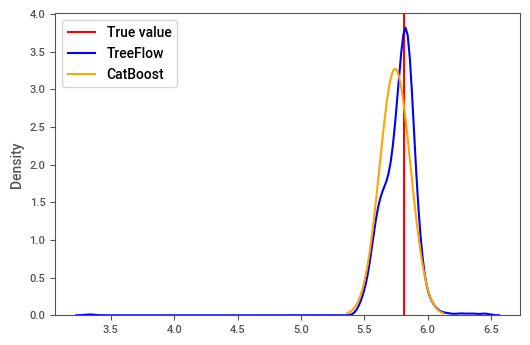

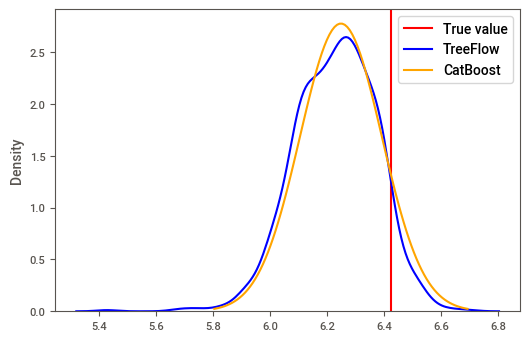

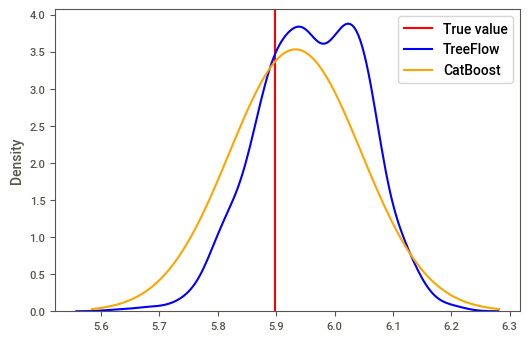

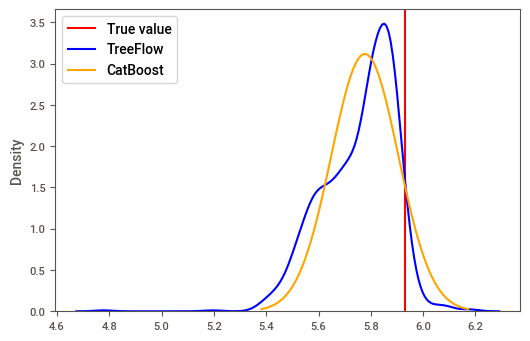

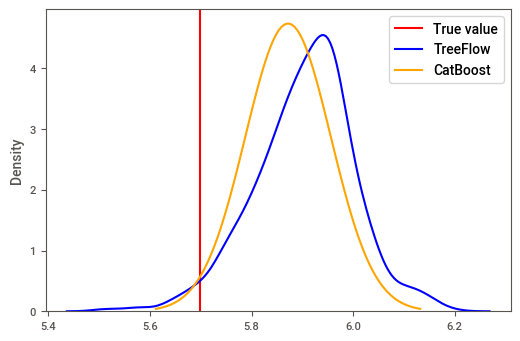

In [20]:
for i in range(10):
    plt.axvline(x=y_test.values[i, :], color='r', label='True value')

    sns.kdeplot(y_test_samples[i, :], color='blue', label='TreeFlow')

    x = np.linspace(
        stats.norm.ppf(0.001, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        stats.norm.ppf(0.999, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        100
    )
    plt.plot(x, stats.norm.pdf(x, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), color = 'orange', label='CatBoost')

    plt.legend()
    plt.show()